In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('dulieu/drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

sex_encoder = LabelEncoder()
bp_encoder = LabelEncoder()
cholesterol_encoder = LabelEncoder()
drug_encoder = LabelEncoder()

df['Sex'] = sex_encoder.fit_transform(df['Sex'])
df['BP'] = bp_encoder.fit_transform(df['BP'])
df['Cholesterol'] = cholesterol_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = drug_encoder.fit_transform(df['Drug'])

scaller = MinMaxScaler()
df[['Age', 'Na_to_K']] = scaller.fit_transform(df[['Age', 'Na_to_K']])

df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.135593,0,0,0,0.596848,4
1,0.542373,1,1,0,0.213397,2
2,0.542373,1,1,0,0.120239,2
3,0.220339,0,2,0,0.047814,3
4,0.779661,0,1,0,0.368191,4


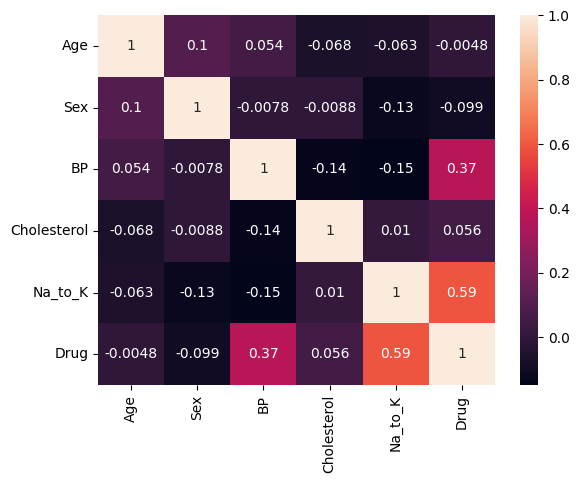

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

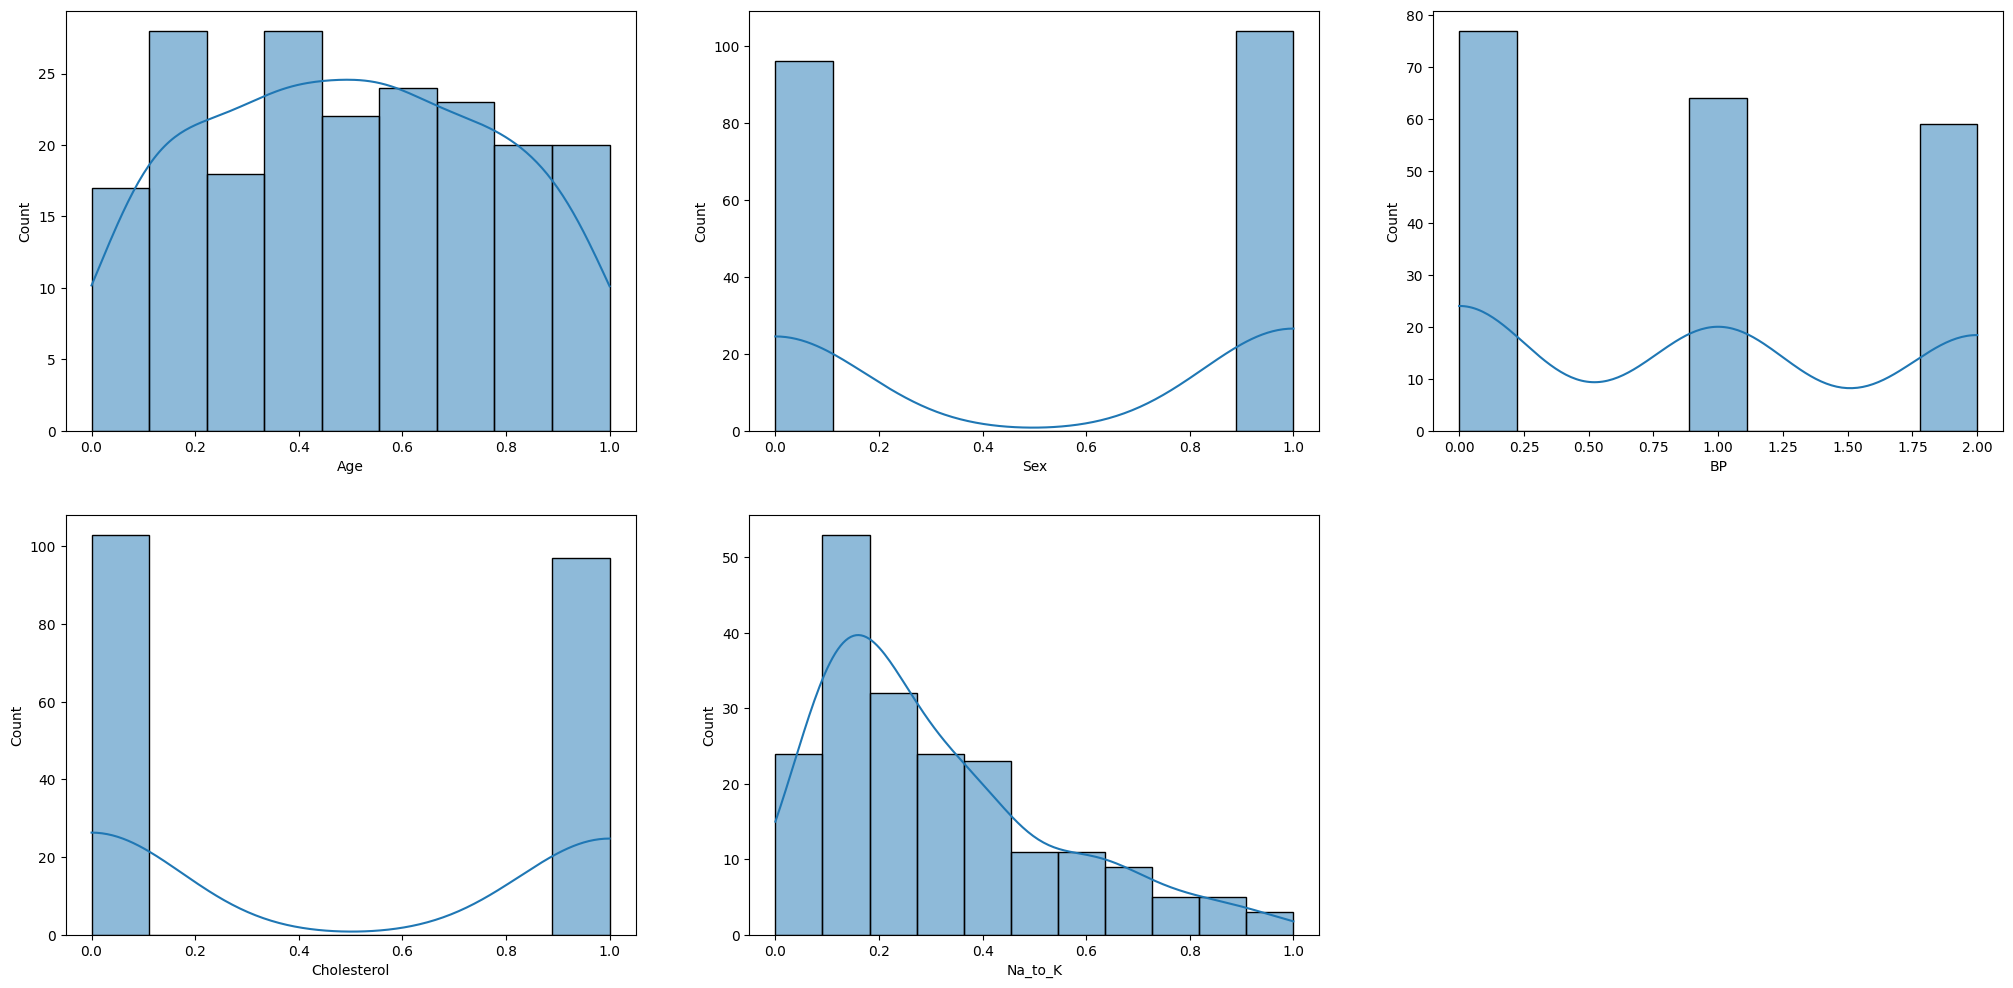

In [9]:
fig = plt.figure(figsize=(25,12))
columns_name = df.iloc[:, :-1].columns
for i in range(len(columns_name)):
    column_name = columns_name[i]
    sub = fig.add_subplot(2, 3, i + 1)
    sns.histplot(df, x=column_name, kde=True)


In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [12]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred) * 100}')

Accuracy score: 100.0


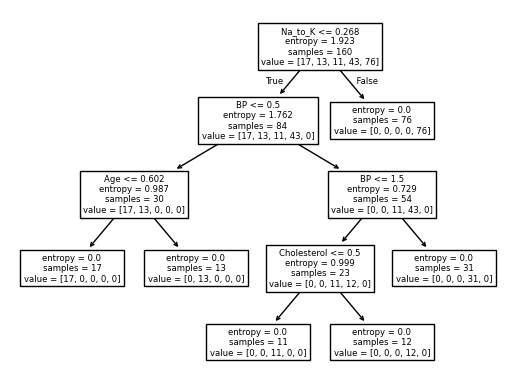

In [13]:
from sklearn.tree import plot_tree

feature_names = X.columns
plot_tree(model, feature_names=feature_names)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()

naive.fit(X_train, y_train)

y_pred = naive.predict(X_test)

print(f'accuracy score: {accuracy_score(y_test, y_pred)}')

accuracy score: 0.9
